# EEOB 546X Python Assignment

## Question 1
### All annotations for this code can be found after each line

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import numpy as np
import pandas as pd
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import seaborn as sns
%matplotlib

Using matplotlib backend: TkAgg


In [2]:
## This function is written by Dr. X

def get_sequences_from_file(fasta_fn): 
    ## Use the definition function to define a function to get the sequences from a file
    sequence_data_dict = {} 
    ## Create a dictionary
    for record in SeqIO.parse(fasta_fn, "fasta"): 
        ## Create a for-loop that pertains to every record in the SeqIO.parse fasta file
        description = record.description.split() 
        ## Split the description field into multiple fields. 
        ## This breaks up the string and will add the data into a string array.
        species_name = description[1] + " " + description[2] 
        ## Create the species names by combining the description information that we specifically split 
        ## into three different pieces of arrangement. The outputs here could vary, 
        ## depending on how the fasta file is arranged, so this command will be specific to the fasta filed being used. 
        sequence_data_dict[species_name] = record.seq 
        ## Create the final dictionary that will list the species names and corresponding information 
        ## from the record above so that the sequences and species, as well as mass, will all be correctly matched.
    return(sequence_data_dict) 
    ## Return the data within "sequence_data_dict"

## Source: http://biopython.org/DIST/docs/api/Bio.SeqIO-module.html


## Question 2

### Here, I took the psuedo-code and was able to write a translate function that will loop over the string of nucleotides. By using BioPython, I was able to identify the codon table that was to be used, set the string, and created the loop that signified that it was to read the DNA string in three-nucleotide segments. I also set it so that it would leave off the stop codon (which is the default setting) and told it to return the values.

In [3]:
## Psuedo-code by Dr. X
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

## My code:

def translate_function(string_nucleotides): 
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] 
    aa_string = "" 
    for x in range (0,len(string_nucleotides)-3,3):
        codon = string_nucleotides[x : x + 3]
        aa_string = aa_string + mito_table.forward_table[codon]
    return(aa_string)

## source: http://biopython.org/DIST/docs/tutorial/Tutorial.html

##### The following tests that translate_function works

In [4]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

In [5]:
print(cytb_seqs['Aptenodytes patagonicus'])

ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCA

In [6]:
translate_function("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

'MAPNLRKSHPLLKMINNSLIDLPTPSNISAWWNFGSLLGICLTTQILTGLLLAMHYTADTTLAFSSVAHTCRNVQYGWLIRNLHANGASFFFICIYLHIGRGFYYGSYLYKETWNTGIILLLTLMATAFVGYVLPWGQMSFWGATVITNLFSAIPYIGQTLVEWAWGGFSVDNPTLTRFFALHFLLPFMIAGLTLIHLTFLHESGSNNPLGIVANSDKIPFHPYYSTKDTLGFALMLLPLTTLALFSPNLLGDPENFTPANPLVTPPHIKPEWYFLFAYAILRSIPNKLGGVLALAASVLILFLIPLLHKSKQRTMTFRPLSQLLFWTLVANLTILTWIGSQPVEHPFIIIGQLASLTYFTILLILFPLIGTLENKMLNH'

## Question 3
### By using a dictionary and defining the new function, I was able to create a much simpler translate function. By designating a key and value within cytb_seqs, I was able to use BioPython to translate the specific values found on the Vertebrate Mitochondrail table 

In [7]:
## My code:
def alternative_translation_function(dict):
    for key, value in cytb_seqs.items():
        aa_string = value.translate(to_stop = True, table="Vertebrate Mitochondrial")
    return(aa_string) 

## source: http://biopython.org/wiki/Seq

##### Testing that the alternative_translation_function works

In [8]:
alternative_translation_function("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

Seq('MAPNLRKSHPLLKTINNSLIDLPTPSNISAWWNFGSLLGICLATQILTGLLLAA...LNH', ExtendedIUPACProtein())

## Question 4
### The ProtParam module was used here, which will allow for the computation of molecular weight through ProteinAnalysis. 

In [9]:
## Notes from Dr. X:
# from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

## My Code:

from Bio.SeqUtils.ProtParam import ProteinAnalysis
def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(aa_seq)
    return(analyzed_seq.molecular_weight())

## source: http://biopython.org/wiki/ProtParam
        

##### Testing that the function will compute the molecular weight

In [10]:
compute_molecular_weight("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

100610.413400002

## Question 5
### This defines a function that will calculate the total amount of nucleotides within the sequence, count the number of "C" and "G" nucleotides, add them together, and divide the "G + C" by the total number of nucleotides. 

In [11]:
## My Code:

def gc_content_aa(aa_seq):
    total = len(aa_seq)
    c = aa_seq.count("C")
    g = aa_seq.count("G")
    gc_total = g+c
    gc_content = gc_total/total
    return(gc_content)
        
## https://stackoverflow.com/questions/16908475/beginner-python-script-for-calculating-gc-content-in-dna-sequence

##### Testing that the function will calculate the GC content

In [12]:
gc_content_aa("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

0.4969378827646544

### Main

In [13]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") 

penguins_df = pd.read_csv("penguins_mass.csv")
species_list = list(penguins_df.species)

## Question 6
### This will add a column filled with NaN labeled "molecular_weight" and "GC_content"

In [14]:
## My code:

penguins_df["molecular_weight"] = np.nan
penguins_df["GC_content"] = np.nan 

## Source: https://stackoverflow.com/questions/16327055/how-to-add-an-empty-column-to-a-dataframe

##### Confirming that the correct columns were added into penguins_df

In [15]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,NaN,NaN
1,Aptenodytes patagonicus,13.40,NaN,NaN
2,Eudyptes chrysocome,2.80,NaN,NaN
3,Eudyptes chrysolophus,4.50,NaN,NaN
4,Eudyptes sclateri,4.25,NaN,NaN
5,Eudyptula minor,1.60,NaN,NaN
6,Pygoscelis adeliae,4.60,NaN,NaN
7,Pygoscelis antarctica,4.10,NaN,NaN
8,Pygoscelis papua,6.10,NaN,NaN
9,Spheniscus demersus,3.20,NaN,NaN


## Question 7
### This is a for-loop that will translate each sequence. It will also get the molecular weight, compute the GC content, and add the generated data into the corresponding empty columns within "penguins_df". The row counter is set at 0 so that all of the species line up correctly when the loop is run. Then, the tables are set equal to the strings and told to enter the data into the dataframe. The final line tells the loop to then move on to the next row of data.

In [16]:
## Dr. X's Notes/Code:
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

## My Code:
row_counter = 0
for key, value in cytb_seqs.items():
    aa_string = translate_function(str(value))
    molecular_weight_table = compute_molecular_weight(aa_string)
    gc_content_table = gc_content_aa(str(value))
    penguins_df.set_value(row_counter, 'molecular_weight', molecular_weight_table)
    penguins_df.set_value(row_counter, 'GC_content', gc_content_table)
    row_counter = row_counter + 1
    
## source: http://pandas-docs.github.io/pandas-docs-travis/generated/pandas.Panel.set_value.html
## source: https://stackoverflow.com/questions/28910089/filling-empty-python-dataframe-using-loops
## source: https://stackoverflow.com/questions/28056171/how-to-build-and-fill-pandas-dataframe-from-for-loop


##### Checking that the correct information was added into the correct columns of penguins_df

In [17]:
penguins_df

,species,mass,molecular_weight,GC_content
0,Aptenodytes forsteri,28.00,42459.6021,0.483815
1,Aptenodytes patagonicus,13.40,42563.7067,0.496938
2,Eudyptes chrysocome,2.80,42475.5753,0.511811
3,Eudyptes chrysolophus,4.50,42445.5493,0.509186
4,Eudyptes sclateri,4.25,42475.5753,0.508311
5,Eudyptula minor,1.60,42491.6408,0.492563
6,Pygoscelis adeliae,4.60,42458.6140,0.490814
7,Pygoscelis antarctica,4.10,42404.5423,0.477690
8,Pygoscelis papua,6.10,42595.8759,0.471566
9,Spheniscus demersus,3.20,42431.5490,0.482940


In [18]:
penguins_df.index[penguins_df['species'] == 'Aptenodytes patagonicus'].tolist()[0]

1

## Question 8
### Using seaborn, a bar-chart is created that will compare the mass with the species name on the x-axis. The names of the species were rotated 90 degrees for ease of reading. 

#### Question 1: The Eudyptula minor is the smallest species of penguin, which is also known as the "Little Penguin" 
#### Question 2: They are only 12" tall, are from Australia, and are called fairy penguins. 

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

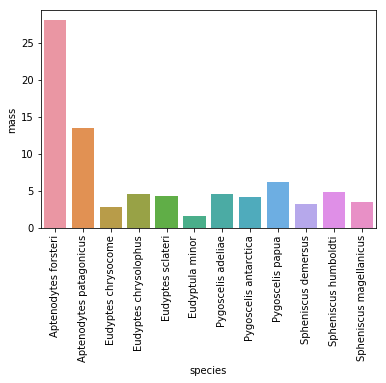

In [20]:
## My Code:

sns.barplot(x="species", y="mass", data=penguins_df)
plt.xticks(rotation=90)

## source: https://stackoverflow.com/questions/26540035/rotate-label-text-in-seaborn-factorplot
##         https://seaborn.pydata.org/tutorial.html
## Question 1: The Eudyptula minor is the smallest species of penguin, which is also known as the "Little Penguin"
## Question 2: They are only 12" tall, are from Australia, and are called fairy penguins. 

## Question 9
### Using a scatter plot in seaborn, the GC_content and molecular_weight data were graphed

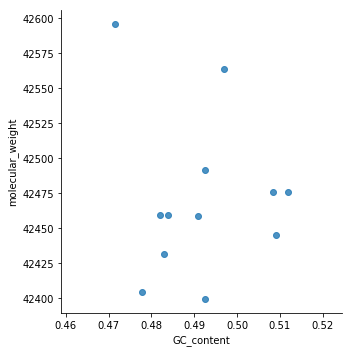

In [21]:
## My Code:

sns.lmplot("GC_content", "molecular_weight", data=penguins_df, fit_reg=False)

## Source: https://seaborn.pydata.org/tutorial.html

## Question 10
### This will save the new DataFrame as a .csv file called "penguins_mass_cytb.csv"

In [22]:
## My Code:
penguins_df.to_csv("penguins_mass_cytb.csv")

## Source: https://chrisalbon.com/python/pandas_saving_dataframe_as_csv.html

## Question 11 (Bonus)
### I was curious if there was any correlation or interesting differences when species and GC content, species and molecular weight, GC content and mass, and molecular weight were compared, so I created several different bar-plots and scatter plots to visualize the data. Additionally, I created a function that calculated the total nucleotide content for A, C, T, and G. Finally, I created a function that will transcribe the DNA by replacing "T" with "U".   

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

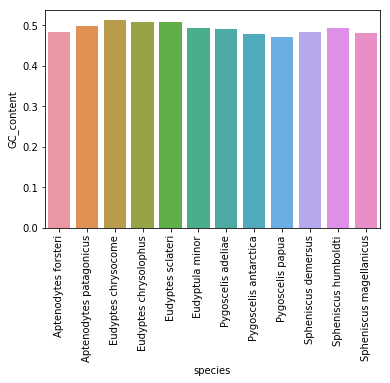

In [23]:
sns.barplot(x="species", y="GC_content", data=penguins_df)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

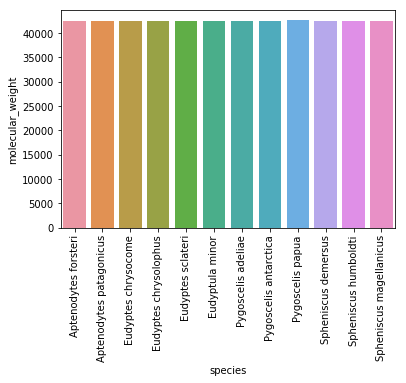

In [24]:
sns.barplot(x="species", y="molecular_weight", data=penguins_df)
plt.xticks(rotation=90)

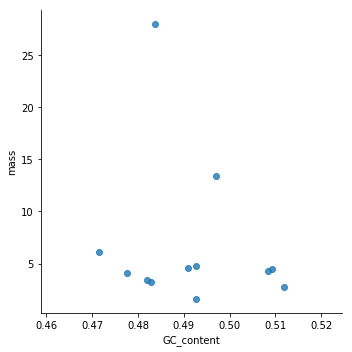

In [25]:
sns.lmplot("GC_content", "mass", data=penguins_df, fit_reg=False)

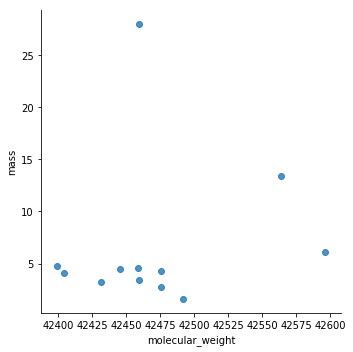

In [26]:
sns.lmplot("molecular_weight", "mass", data=penguins_df, fit_reg=False)

In [27]:
def nucleotide_content_aa(aa_seq):
    total = len(aa_seq)
    c = aa_seq.count("C")
    g = aa_seq.count("G")
    a = aa_seq.count("A")
    t = aa_seq.count("T")
    c_content = (c/total) * 100
    g_content = (g/total) * 100
    a_content = (a/total) * 100
    t_content = (t/total) * 100
    return(c_content, g_content, a_content, t_content)

In [28]:
nucleotide_content_aa("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

(36.92038495188101, 12.773403324584425, 27.384076990376204, 22.922134733158355)

In [29]:
def transcribe(dict):
    for key, value in cytb_seqs.items():
        aa_string = value.transcribe()
    return dict.replace ('T','U')

In [30]:
transcribe("ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATCTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTGGCCTTCTCCTCAGTCGCCCACACATGCCGAAATGTACAGTACGGCTGACTAATCCGCAACCTACATGCAAACGGAGCATCATTCTTTTTCATCTGCATCTACCTCCACATCGGCCGTGGATTTTACTACGGCTCCTACCTATACAAAGAAACCTGAAACACGGGCATCATTCTCCTACTCACACTCATAGCAACCGCCTTCGTAGGCTACGTCCTGCCATGGGGACAAATATCATTCTGAGGGGCCACAGTCATTACCAACTTATTCTCAGCCATCCCCTACATCGGCCAAACCCTCGTAGAATGAGCCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTCCCCTTCATAATCGCAGGCCTCACCCTCATCCATCTCACCTTCCTCCACGAATCAGGCTCAAACAACCCACTGGGCATCGTAGCTAACTCCGATAAGATCCCATTCCATCCCTACTACTCCACAAAAGACACCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTCGCCCTATTCTCCCCCAACTTACTGGGGGACCCAGAAAACTTTACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTGGGGGGAGTCCTAGCCCTAGCAGCCTCAGTACTGATCCTATTCCTAATCCCCCTCCTCCACAAGTCCAAACAGCGTACAATAACCTTCCGTCCCCTCTCCCAGCTCCTATTCTGAACCTTAGTAGCCAACCTCACCATCCTAACATGGATCGGCAGCCAACCAGTAGAACACCCCTTCATCATCATCGGCCAACTAGCTTCCCTCACCTACTTCACCATCCTCCTAATCCTCTTCCCCCTCATCGGGACTCTAGAAAACAAGATACTTAACCACTAA")

'AUGGCCCCAAACCUCCGAAAAUCCCAUCCUCUCCUAAAAAUAAUUAAUAACUCCCUAAUCGACCUGCCCACCCCAUCAAACAUCUCUGCCUGAUGAAACUUCGGAUCUCUCCUAGGCAUCUGCCUAACUACACAAAUCUUAACCGGCCUCCUACUAGCUAUACACUACACUGCAGACACAACCCUGGCCUUCUCCUCAGUCGCCCACACAUGCCGAAAUGUACAGUACGGCUGACUAAUCCGCAACCUACAUGCAAACGGAGCAUCAUUCUUUUUCAUCUGCAUCUACCUCCACAUCGGCCGUGGAUUUUACUACGGCUCCUACCUAUACAAAGAAACCUGAAACACGGGCAUCAUUCUCCUACUCACACUCAUAGCAACCGCCUUCGUAGGCUACGUCCUGCCAUGGGGACAAAUAUCAUUCUGAGGGGCCACAGUCAUUACCAACUUAUUCUCAGCCAUCCCCUACAUCGGCCAAACCCUCGUAGAAUGAGCCUGAGGUGGCUUUUCAGUAGACAACCCCACAUUAACCCGAUUUUUCGCACUACACUUCCUCCUCCCCUUCAUAAUCGCAGGCCUCACCCUCAUCCAUCUCACCUUCCUCCACGAAUCAGGCUCAAACAACCCACUGGGCAUCGUAGCUAACUCCGAUAAGAUCCCAUUCCAUCCCUACUACUCCACAAAAGACACCCUAGGAUUCGCACUCAUACUUCUCCCACUAACAACCCUCGCCCUAUUCUCCCCCAACUUACUGGGGGACCCAGAAAACUUUACCCCAGCAAACCCACUAGUCACACCCCCACACAUCAAACCAGAAUGAUACUUCCUAUUUGCAUACGCUAUCCUACGCUCAAUCCCCAACAAACUGGGGGGAGUCCUAGCCCUAGCAGCCUCAGUACUGAUCCUAUUCCUAAUCCCCCUCCUCCACAAGUCCAAACAGCGUACAAUAACCUUCCGUCCCCUCUCCCAGCUCCUAUUCUGAACCUUAGUAGCCAACCUC